Import numpy and pandas.

In [1]:
import numpy as np
import pandas as pd

Run the cell below to import matplotlib.pyplot.

In [2]:
import matplotlib.pyplot as plt

Import the "sin_cos.csv" file into a pandas DataFrame called df.<br>
Set the index to the first column. Use shift-tab for help if necessary.<br>
Display df.

In [3]:
# Importing the CSV file into a DataFrame
df = pd.read_csv("sin_cos.csv")

# Displaying the DataFrame
df

,Unnamed: 0,x,y,z
0,0,0.000000,0.0,1.000000
1,1,0.006289,0.006289433316067751,0.999980
2,2,0.012579,0.012578617838741058,0.999921
3,3,0.018868,NaN,0.999822
4,4,NaN,0.025155245389375847,0.999684
...,...,...,...,...
995,995,6.258027,-0.02515524538937684,NaN
996,996,NaN,-0.018867304784467676,0.999822
997,997,6.270606,-0.012578617838742121,NaN
998,998,6.276896,-0.006289433316068405,0.999980


Notice there are some NaNs in the data (missing values). We'll fix the NaNs below, but first let's check if the data has been correctly loaded as float point numbers. Run the cell below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   x           812 non-null    float64
 2   y           930 non-null    object 
 3   z           870 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


It looks like the "y" column has not been imported as floating point numbers. Let us try to convert the dataframe to numerical values. Run the cell below.

In [5]:
#df.apply(pd.to_numeric)

Oh oh, that didn't work. Read the above error message to see what is going wrong. Display the row with the problem.

In [6]:
# Reload the CSV file, treating all columns as objects (strings)
df = pd.read_csv("sin_cos.csv", dtype=str, index_col=0)

# Display the row with the problematic value
df.loc[141]

x     0.8868159442565782
y    a0.7750637288796015
z     0.6318830716004722
Name: 141, dtype: object

Remove the non-numeric character, and display that same row again.

In [7]:
#import re

In [8]:
# Extract the numeric part from the "y" column
# df['y'] = df['y'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0] if isinstance(x, str) else x)

# Display the row again
# df.loc[141]

In [9]:
# Remove 'a' characters from the 'y' column
df.loc[141, 'y'] = df.loc[141, 'y'].replace('a', '')

# Display the modified DataFrame
df.loc[141]

x    0.8868159442565782
y    0.7750637288796015
z    0.6318830716004722
Name: 141, dtype: object

The problematic value still has a datatype of "object". Now, convert the entire dataframe to numerical values and display df.info() again.

In [10]:
# Convert entire DataFrame to numerical values
df = df.apply(pd.to_numeric, errors='coerce')

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       812 non-null    float64
 1   y       930 non-null    float64
 2   z       870 non-null    float64
dtypes: float64(3)
memory usage: 63.5 KB


Now that we have numerical data, we can produce a visualization to see how it looks. Just run the cell below.

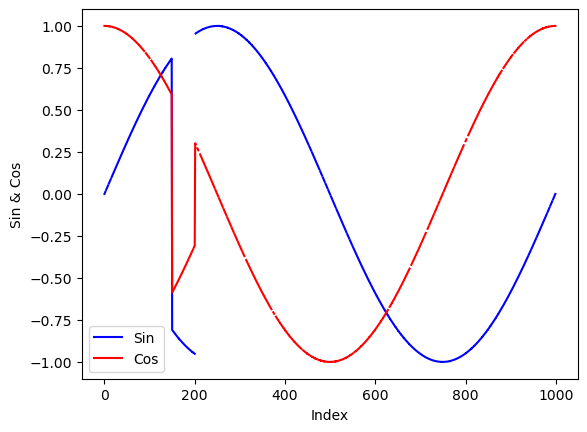

In [11]:
# plot the data to see the gaps
plt.plot(df["y"],color="b")
plt.plot(df["z"],color="r")
plt.xlabel("Index")
plt.ylabel("Sin & Cos")
plt.legend(["Sin","Cos"])

We can see there are some gaps in the plot where the NaNs are present. More troubling though is the area between index 145 and 205 where the sine and cosine values seem incorrect. Display a slice of the dataframe showing rows 145 to 205.

In [12]:
df.iloc[145:205]

,x,y,z
145,0.911974,0.790714,0.612186
146,0.918263,0.794548,0.607201
147,0.924553,0.798352,0.602192
148,0.930842,0.802123,0.597159
149,0.937132,0.805863,0.592102
150,NaN,-0.809571,-0.587022
151,0.949711,-0.813247,-0.581918
152,0.956000,-0.816891,-0.576792
153,0.962290,-0.820503,-0.571643
154,0.968579,-0.824082,-0.566471


Can you see what the problem is, and which range of lines have the problem? Fix it and display the rows from 145 to 205 again.

In [13]:
# Calculate absolute values for 'y' and 'z' columns in rows 145 to 205
df.loc[145:205, ['y', 'z']] = df.loc[145:205, ['y', 'z']].abs()

# Display the rows from 145 to 205 again
df.iloc[145:205]

,x,y,z
145,0.911974,0.790714,0.612186
146,0.918263,0.794548,0.607201
147,0.924553,0.798352,0.602192
148,0.930842,0.802123,0.597159
149,0.937132,0.805863,0.592102
150,NaN,0.809571,0.587022
151,0.949711,0.813247,0.581918
152,0.956000,0.816891,0.576792
153,0.962290,0.820503,0.571643
154,0.968579,0.824082,0.566471


Produce another plot to see how the data looks now. Just run the cell below.

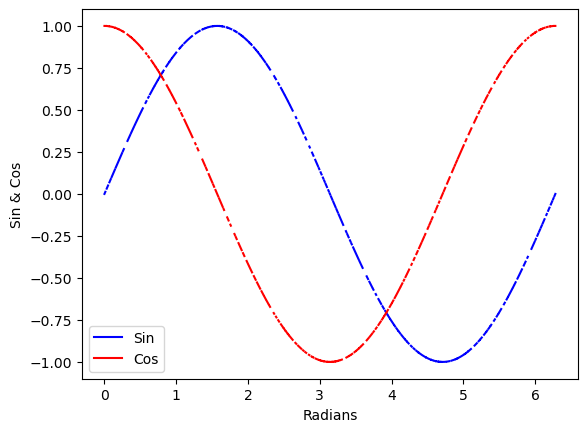

In [14]:
# plot the data to see the gaps
plt.plot(df["x"], df["y"],color="b")
plt.plot(df["x"], df["z"],color="r")
plt.xlabel("Radians")
plt.ylabel("Sin & Cos")
plt.legend(["Sin","Cos"])

We can see there are still gaps where the NaNs are present.
Use one of the pandas methods to fill in the missing data.<br>
You could fill in a default value, fill in a mean, or do simple interpolation.<br>
You can do some web searching on different ways to fill in missing data in pandas.<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation<br><br>
Fill in the missing values and save this as a new DataFrame called dfi.

In [15]:
# Create a copy of the DataFrame
dfi = df.copy()

# Fill in the missing values
dfi['y'] = dfi['y'].interpolate()
dfi['x'] = dfi['x'].interpolate()
dfi['z'] = dfi['z'].interpolate()

# Display the first few rows of the new DataFrame to confirm the changes
dfi.head()

,x,y,z
0,0.000000,0.000000,1.000000
1,0.006289,0.006289,0.999980
2,0.012579,0.012579,0.999921
3,0.018868,0.018867,0.999822
4,0.025158,0.025155,0.999684


Let's visualize your new DataFrame with the NaNs filled in. Run the cell below.<br>
Feel free to try filling in the missing data a few different ways and seeing what the plot looks like.<br>
Choose the one that looks best.

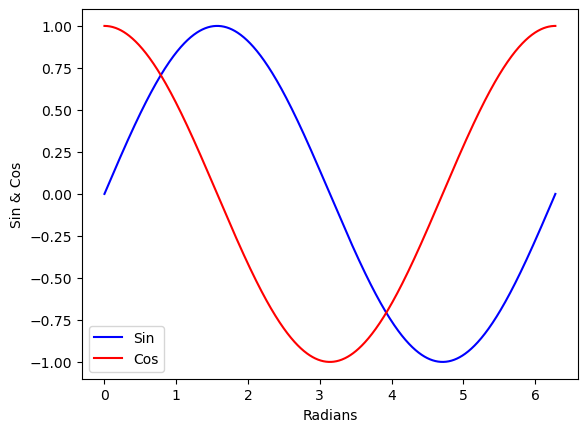

In [16]:
# plot again to see the gaps filled in nicely
plt.plot(dfi["x"],dfi["y"],color="b")
plt.plot(dfi["x"],dfi["z"],color="r")
plt.xlabel("Radians")
plt.ylabel("Sin & Cos")
plt.legend(["Sin","Cos"])

Okay, very nice. Now, add a new column named "tan" that holds the tangent of x, i.e. $\tan(x)$. Display only the x and tan columns.

In [17]:
# Add a new column "tan" to the DataFrame
dfi['tan'] = np.tan(dfi['x'])

# Display only the "x" and "tan" columns
dfi[['x', 'tan']]

,x,tan
0,0.000000,0.000000e+00
1,0.006289,6.289558e-03
2,0.012579,1.257961e-02
3,0.018868,1.887066e-02
4,0.025158,2.516321e-02
...,...,...
995,6.258027,-2.516321e-02
996,6.264317,-1.887066e-02
997,6.270606,-1.257961e-02
998,6.276896,-6.289558e-03


The values in the x-column are angles, expressed as radians. Change the x column so that the angles are written as degrees. Display the x and tan columns of the dataframe.

In [18]:
# Set display format for float values
pd.options.display.float_format = '{:.6f}'.format

dfi[['x', 'tan']]

,x,tan
0,0.000000,0.000000
1,0.006289,0.006290
2,0.012579,0.012580
3,0.018868,0.018871
4,0.025158,0.025163
...,...,...
995,6.258027,-0.025163
996,6.264317,-0.018871
997,6.270606,-0.012580
998,6.276896,-0.006290


Now try narrowing down dfi.<br>
Select x values greater than 90 degrees, and less than 270 degrees; store the x and tan columns in a new dataframe called df_tan.<br>
Display the results.

In [19]:
# Convert radians to degrees in the 'x' column
dfi['x'] = np.degrees(dfi['x'])

# Boolean indexing to select rows where x values are between 90 and 270 degrees
df_tan = dfi[(dfi['x'] > 90) & (dfi['x'] < 270)][['x', 'tan']]

# Display the resulting DataFrame
df_tan

,x,tan
250,90.090090,-635.982628
251,90.450450,-127.194010
252,90.810811,-70.660078
253,91.171171,-48.914967
254,91.531532,-37.401863
...,...,...
745,268.468468,37.401863
746,268.828829,48.914967
747,269.189189,70.660078
748,269.549550,127.194010


Run the cell below to visualize the data in df_tan.

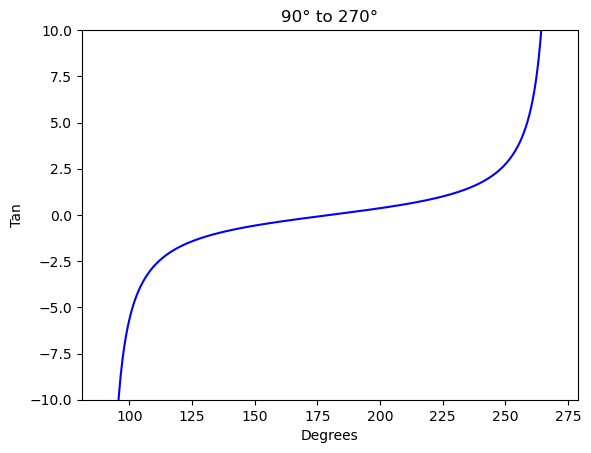

In [20]:
plt.plot(df_tan["x"], df_tan["tan"], color="b")
plt.ylim([-10, 10])
plt.xlabel("Degrees")
plt.ylabel("Tan")
plt.title("90° to 270°")
plt.show()